In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, NoSuchElementException
from bs4 import BeautifulSoup
import time
from webdriver_manager.chrome import ChromeDriverManager

# 리뷰 스크래핑 함수
def scrape_saladrang_reviews(product_url, max_reviews=100):
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    wait = WebDriverWait(driver, 10)

    try:
        driver.get(product_url)
        time.sleep(3)  # 초기 페이지 로딩 대기

        all_reviews = []  # 모든 리뷰 저장
        current_page_group = 1

        while len(all_reviews) < max_reviews:
            # 현재 페이지 그룹(1~9, 10~18 등) 탐색
            for page_num in range(current_page_group, current_page_group + 9):
                try:
                    print(f"--- {page_num} 페이지 리뷰 데이터 가져오기 ---")
                    page_button = wait.until(EC.element_to_be_clickable(
                        (By.XPATH, f"//a[contains(@onclick, 'SITE_SHOP_DETAIL.changeContentPCTab') and text()='{page_num}']")
                    ))
                    page_button.click()
                    time.sleep(2)  # 페이지 로딩 대기

                    # 리뷰 수집
                    soup = BeautifulSoup(driver.page_source, "html.parser")
                    reviews = soup.select("span._review_body")  # 리뷰 선택자

                    for review in reviews:
                        review_text = review.get_text(separator=" ", strip=True)
                        if review_text and review_text not in all_reviews:
                            print(review_text)
                            all_reviews.append(review_text)
                            if len(all_reviews) >= max_reviews:
                                return all_reviews
                except TimeoutException:
                    print(f"{page_num} 페이지 버튼이 없습니다. 마지막 페이지일 수 있습니다.")
                    break

            # 다음 페이지 그룹으로 이동 (다음 버튼 클릭)
            try:
                print("--- 다음 버튼 클릭 중 ---")
                next_button = wait.until(EC.element_to_be_clickable(
                    (By.XPATH, "//a[contains(@onclick, 'SITE_SHOP_DETAIL.changeContentPCTab') and i[@class='icon-arrow-right']]")
                ))
                next_button.click()
                time.sleep(3)  # 페이지 그룹 로딩 대기
                current_page_group += 9  # 페이지 그룹을 다음으로 이동
            except (TimeoutException, NoSuchElementException):
                print("다음 버튼이 없습니다. 탐색을 종료합니다.")
                break

        return all_reviews[:max_reviews]

    finally:
        driver.quit()

# 실행 코드
if __name__ == "__main__":
    product_url = "https://saladrang.co.kr/all/?idx=248#prod_detail_review"
    reviews = scrape_saladrang_reviews(product_url, max_reviews=100)

    print("\n총 리뷰 수:", len(reviews))
    for i, review in enumerate(reviews, start=1):
        print(f"{i}. {review}")


--- 1 페이지 리뷰 데이터 가져오기 ---
감사합니다. 
맛있는 샐러드 만들어 신선하고 안전하게 배송 해 주셔서 정말 감사합니다.
믿고 주문하는 상품입니다.
항상 잘 사용하고 있습니다. 
진심으로 감사합니다.
항상 믿고 주문합니다. 
신선하고 맛있게 만들어 정성까지 듬뿍 담아 보내 주셔서 감사합니다.
고구마샐러드 정말 맛있어요. 치즈 올려 오븐기에 넣어 수저로 떠서 드셔 보세요
고구마 샐러드도 호박 샐러드도 맛있어요.
--- 2 페이지 리뷰 데이터 가져오기 ---
단호박 샐러드 맛있어요.
항상 감사합니다. 
믿고 주문 할 수 있어 쵝오의 상품입니다
고구마무스가 부족해서 주문해서 잘 사용했습니다.
최고의 맛
최고의 신선함
항상 감사합니다
너무 너무 잘 먹고 있어요. 앞으로도 잘 부탁합니다
--- 3 페이지 리뷰 데이터 가져오기 ---
일주일에 한번 10봉씩 믿고 주문하는 샐러드입니다. 오늘도 주문했습니다.
신선하고 맛있는 고구마 샐러드 덕분에 희 가게베스트 메뉴요, 효자 상품입니다. 항상 좋은 제품 공급해 주셔서 진심으로 감사합니다.
감자샐러드 빵에 발라 아침대용으로 좋아요 달지 않고 담백하니 질리지 않아 가족들이 좋아해요
항상 감사합니다.
즐거운 성탄절 보내세요^^
달콤하고 부드러워 아이들이 너무 잘 먹어요. 또 주문하러 왔어요
--- 4 페이지 리뷰 데이터 가져오기 ---
항상 감사합니다.
신선한 상품으로 최고의 서비스 상품을 제공하고 있습니다.
가게서 너무 잘 사용하고 있어요. 맛도 좋은 샐러드 손님들께 인기입니다.
샐러드미인 항상 맛있고 신선해서 믿고 주문합니다.
감사합니다. 
신선 상품, 안전하고 빠르게 배송 해 주셔서 항상 잘 사용합니다.
일주일에 한번씩 구매하는 효자 상품입니다.
--- 5 페이지 리뷰 데이터 가져오기 ---
항상 이용하고 있습니다.
추석연휴에 잘 사용했습니다.
따라올수 없는맛 샐러드 최고예요
스위트꽃맛살 최고입니다. 늘 잘  애용하고 있어요
집안 대소사때마다 애용해요 가족들이 모두좋아하는데 가성비도 굿!
샐러드중 죄고 가게에서 

In [4]:
import pandas as pd
df = pd.DataFrame(reviews, columns = ['review'])
cleaned_reviews = [review.replace("\n", " ") for review in reviews]

# DataFrame 생성
df = pd.DataFrame(cleaned_reviews, columns=["review"])

# DataFrame 출력
print(df)

                                               review
0    감사합니다.  맛있는 샐러드 만들어 신선하고 안전하게 배송 해 주셔서 정말 감사합니다.
1         믿고 주문하는 상품입니다. 항상 잘 사용하고 있습니다.  진심으로 감사합니다.
2   항상 믿고 주문합니다.  신선하고 맛있게 만들어 정성까지 듬뿍 담아 보내 주셔서 감...
3         고구마샐러드 정말 맛있어요. 치즈 올려 오븐기에 넣어 수저로 떠서 드셔 보세요
4                              고구마 샐러드도 호박 샐러드도 맛있어요.
..                                                ...
95                                  말 맛있어요 재주문 100프로!
96                                 정말 맛있어요 재주문 100프로!
97                                      맛있어요  또 주문할께요
98                                        맛있어요맛있어요!!!
99                                       잘 받았습니다!!!^^

[100 rows x 1 columns]


In [5]:
df['review']

0      감사합니다.  맛있는 샐러드 만들어 신선하고 안전하게 배송 해 주셔서 정말 감사합니다.
1           믿고 주문하는 상품입니다. 항상 잘 사용하고 있습니다.  진심으로 감사합니다.
2     항상 믿고 주문합니다.  신선하고 맛있게 만들어 정성까지 듬뿍 담아 보내 주셔서 감...
3           고구마샐러드 정말 맛있어요. 치즈 올려 오븐기에 넣어 수저로 떠서 드셔 보세요
4                                고구마 샐러드도 호박 샐러드도 맛있어요.
                            ...                        
95                                    말 맛있어요 재주문 100프로!
96                                   정말 맛있어요 재주문 100프로!
97                                        맛있어요  또 주문할께요
98                                          맛있어요맛있어요!!!
99                                         잘 받았습니다!!!^^
Name: review, Length: 100, dtype: object

In [6]:
#본문 txt에 저장
text = open("shop_text.txt",'w',encoding='utf-8') 
for i in df['review']:
    text.write(i)
text.close()

In [7]:
# text 읽기
file = open("shop_text.txt", mode='r', encoding='utf-8') # utf-8 중 선택
doc = file.read()
file.close()
doc

'감사합니다.  맛있는 샐러드 만들어 신선하고 안전하게 배송 해 주셔서 정말 감사합니다.믿고 주문하는 상품입니다. 항상 잘 사용하고 있습니다.  진심으로 감사합니다.항상 믿고 주문합니다.  신선하고 맛있게 만들어 정성까지 듬뿍 담아 보내 주셔서 감사합니다.고구마샐러드 정말 맛있어요. 치즈 올려 오븐기에 넣어 수저로 떠서 드셔 보세요고구마 샐러드도 호박 샐러드도 맛있어요.단호박 샐러드 맛있어요.항상 감사합니다.  믿고 주문 할 수 있어 쵝오의 상품입니다고구마무스가 부족해서 주문해서 잘 사용했습니다.최고의 맛 최고의 신선함 항상 감사합니다너무 너무 잘 먹고 있어요. 앞으로도 잘 부탁합니다일주일에 한번 10봉씩 믿고 주문하는 샐러드입니다. 오늘도 주문했습니다.신선하고 맛있는 고구마 샐러드 덕분에 희 가게베스트 메뉴요, 효자 상품입니다. 항상 좋은 제품 공급해 주셔서 진심으로 감사합니다.감자샐러드 빵에 발라 아침대용으로 좋아요 달지 않고 담백하니 질리지 않아 가족들이 좋아해요항상 감사합니다. 즐거운 성탄절 보내세요^^달콤하고 부드러워 아이들이 너무 잘 먹어요. 또 주문하러 왔어요항상 감사합니다. 신선한 상품으로 최고의 서비스 상품을 제공하고 있습니다.가게서 너무 잘 사용하고 있어요. 맛도 좋은 샐러드 손님들께 인기입니다.샐러드미인 항상 맛있고 신선해서 믿고 주문합니다.감사합니다.  신선 상품, 안전하고 빠르게 배송 해 주셔서 항상 잘 사용합니다.일주일에 한번씩 구매하는 효자 상품입니다.항상 이용하고 있습니다. 추석연휴에 잘 사용했습니다.따라올수 없는맛 샐러드 최고예요스위트꽃맛살 최고입니다. 늘 잘  애용하고 있어요집안 대소사때마다 애용해요 가족들이 모두좋아하는데 가성비도 굿!샐러드중 죄고 가게에서 잘 사용하고 있어오샐러드는 샐러드미인이 최고 또 구매하러 왔어요항상 감사합니다. 제품 품절 떠 있어서 깜짝 놀랬어요. 그래서 다른 제품 어쩔 수 없이 주문했는데 샐러드랑의 신선한 맛이 언제나 최고입니다. 품절 안되게 해 주세요.단호박샐러드 단호박이 큼직하게 들어 있어  너무

In [8]:
from konlpy.tag import Kkma # KoNLPy 코엔엘파이
kkma = Kkma()
from wordcloud import WordCloud
import matplotlib.pyplot as plt

ex_sent = kkma.sentences(doc)
print (ex_sent)

['감사합니다.', '맛있는 샐러드 만들어 신선하고 안전하게 배송 해 주셔서 정말 감사합니다.', '믿고 주문하는 상품입니다.', '항상 잘 사용하고 있습니다.', '진심으로 감사합니다.', '항상 믿고 주문합니다.', '신선하고 맛있게 만들어 정성까지 듬뿍 담아 보내', '주셔서 감사합니다.', '고구마 샐러드 정말 맛있어요.', '치즈 올려 오븐 기에 넣어 수저로 떠서 드셔 보세요 고구마 샐러드도 호박 샐러드도 맛있어요.', '단호박 샐러드 맛있어요.', '항상 감사합니다.', '믿고 주문 할 수 있어 쵝오의 상품입니다', '고구마 무스가 부족해서 주문해서 잘 사용했습니다.', '최고의 맛 최고의 신선함 항상 감사합니다', '너무 너무 잘 먹고 있어요.', '앞으로도 잘 부탁합니다', '일주일에 한번 10 봉씩 믿고 주문하는 샐러드입니다.', '오늘도 주문했습니다.', '신선하고 맛있는 고구마 샐러드 덕분에 희 가게베스트 메뉴요, 효자 상품입니다.', '항상 좋은 제품 공급해 주셔서 진심으로 감사합니다.', '감자 샐러드 빵에 발라 아침 대용으로 좋아요', '달지 않고 담백하니 질리지 않아 가족들이 좋아해요', '항상 감사합니다.', '즐거운 성탄절 보내세요', '^^ 달콤하고 부드러워 아이들이 너무 잘 먹어요.', '또 주문하러 왔어요', '항상 감사합니다.', '신선한 상품으로 최고의 서비스 상품을 제공하고 있습니다.', '가게서 너무 잘 사용하고 있어요.', '맛도 좋은 샐러드 손님들께 인기입니다.', '샐러드 미인 항상 맛있고 신선해서 믿고 주문합니다.', '감사합니다.', '신 선 상품, 안전하고 빠르게 배송 해 주셔서 항상 잘 사용합니다.', '일주일에 한번씩 구매하는 효자 상품입니다.', '항상 이용하고 있습니다.', '추석 연휴에 잘 사용했습니다.', '따라올 수 없는 맛 샐러드 최고 예요 스위트 꽃 맛살 최고입니다.', '늘 잘 애용하고 있어요', '집안 대소사 때마다 애 용해요 가족들이 모두 좋아하는데 가 성비도 굿! 샐러드 중 죄고 가게

In [9]:
from re import match  # 전처리 위해서 정규표현식 관련 re 패키지 import
nouns = []
for sent in ex_sent : 
    for noun in kkma.nouns(sent) :
        # 단어 전처리 : 2음절 이상, 수사 제외
        if len(str(noun)) >= 2 and not(match('^[0-9]', noun)) :
            nouns.append(noun)
            
nouns
            


['감사',
 '샐러드',
 '신선',
 '안전',
 '배송',
 '감사',
 '주문',
 '상품',
 '사용',
 '진심',
 '감사',
 '주문',
 '신선',
 '정성',
 '감사',
 '고구마',
 '샐러드',
 '치즈',
 '오븐',
 '수저',
 '보세',
 '고구마',
 '샐러드',
 '호박',
 '단호박',
 '샐러드',
 '감사',
 '주문',
 '쵝오',
 '상품',
 '고구마',
 '무스',
 '부족',
 '주문',
 '최고',
 '감사',
 '부탁',
 '일주일',
 '한번',
 '주문',
 '샐러드',
 '오늘',
 '주문',
 '신선',
 '고구마',
 '샐러드',
 '덕분',
 '가게베스트',
 '메뉴',
 '효자',
 '상품',
 '제품',
 '공급',
 '진심',
 '감사',
 '감자',
 '샐러드',
 '아침',
 '대용',
 '가족',
 '감사',
 '성탄절',
 '아이',
 '주문',
 '감사',
 '상품',
 '최고',
 '서비스',
 '제공',
 '가게',
 '사용',
 '샐러드',
 '손님',
 '인기',
 '샐러드',
 '미인',
 '신선',
 '주문',
 '감사',
 '상품',
 '안전',
 '배송',
 '사용',
 '일주일',
 '한번',
 '구매',
 '효자',
 '상품',
 '이용',
 '추석',
 '연휴',
 '샐러드',
 '최고',
 '스위트',
 '맛살',
 '애용',
 '집안',
 '대소사',
 '용해',
 '가족',
 '성비',
 '샐러드',
 '죄고',
 '가게',
 '사용',
 '미인',
 '최고',
 '구매',
 '감사',
 '제품',
 '품절',
 '제품',
 '주문',
 '샐러드',
 '최고',
 '품절',
 '단호박',
 '샐러드',
 '구입',
 '최고',
 '감사',
 '상품',
 '감사',
 '고구마',
 '샐러드',
 '다음날',
 '택배',
 '안전',
 '오늘',
 '주문',
 '단호박',
 '샐러드',
 '애용',
 '제품',
 '샐러드',
 '최고',
 '할머니',
 '감사',

In [10]:
word_count = {} # 빈 set
for noun in nouns :
    word_count[noun] = word_count.get(noun, 0) + 1

from collections import Counter

counter = Counter(word_count)

top50 = counter.most_common(50)
print (top50)

[('샐러드', 23), ('감사', 20), ('주문', 12), ('최고', 10), ('배송', 9), ('상품', 7), ('구매', 7), ('제품', 6), ('사용', 5), ('고구마', 5), ('단호박', 5), ('신선', 4), ('미인', 4), ('이용', 4), ('애용', 4), ('안전', 3), ('오늘', 3), ('서비스', 3), ('손님', 3), ('품절', 3), ('만족', 3), ('진심', 2), ('일주일', 2), ('한번', 2), ('효자', 2), ('가족', 2), ('가게', 2), ('할머니', 2), ('처음', 2), ('주시', 2), ('젤리', 2), ('번째', 2), ('재주', 2), ('프로', 2), ('정성', 1), ('치즈', 1), ('오븐', 1), ('수저', 1), ('보세', 1), ('호박', 1), ('쵝오', 1), ('무스', 1), ('부족', 1), ('부탁', 1), ('덕분', 1), ('가게베스트', 1), ('메뉴', 1), ('공급', 1), ('감자', 1), ('아침', 1)]


In [11]:
stopwords = ['여기', '번은', '하이', '때문', '중인']

words = [word for word in nouns if word not in stopwords]

word_count = {} # 빈 set

for noun in words :
    word_count[noun] = word_count.get(noun, 0) + 1

word_count

len(word_count)

98

In [12]:

from collections import Counter

counter = Counter(word_count)

top50 = counter.most_common(50)
print (top50)

[('샐러드', 23), ('감사', 20), ('주문', 12), ('최고', 10), ('배송', 9), ('상품', 7), ('구매', 7), ('제품', 6), ('사용', 5), ('고구마', 5), ('단호박', 5), ('신선', 4), ('미인', 4), ('이용', 4), ('애용', 4), ('안전', 3), ('오늘', 3), ('서비스', 3), ('손님', 3), ('품절', 3), ('만족', 3), ('진심', 2), ('일주일', 2), ('한번', 2), ('효자', 2), ('가족', 2), ('가게', 2), ('할머니', 2), ('처음', 2), ('주시', 2), ('젤리', 2), ('번째', 2), ('재주', 2), ('프로', 2), ('정성', 1), ('치즈', 1), ('오븐', 1), ('수저', 1), ('보세', 1), ('호박', 1), ('쵝오', 1), ('무스', 1), ('부족', 1), ('부탁', 1), ('덕분', 1), ('가게베스트', 1), ('메뉴', 1), ('공급', 1), ('감자', 1), ('아침', 1)]


(-0.5, 799.5, 799.5, -0.5)

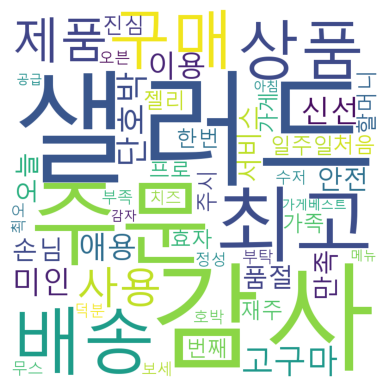

In [13]:
wc = WordCloud(font_path='malgun', width=400, height=400, background_color = 'white', scale=2.0, max_font_size=250) # white
gen = wc.generate_from_frequencies(dict(top50))

plt.figure()
plt.imshow(gen)
plt.axis('off')

상위 50개 단어: [('샐러드', 23), ('감사', 20), ('주문', 12), ('최고', 10), ('배송', 9), ('상품', 7), ('구매', 7), ('제품', 6), ('사용', 5), ('고구마', 5), ('단호박', 5), ('신선', 4), ('미인', 4), ('이용', 4), ('애용', 4), ('안전', 3), ('오늘', 3), ('서비스', 3), ('손님', 3), ('품절', 3), ('만족', 3), ('진심', 2), ('일주일', 2), ('한번', 2), ('효자', 2), ('가족', 2), ('가게', 2), ('할머니', 2), ('처음', 2), ('주시', 2), ('젤리', 2), ('번째', 2), ('재주', 2), ('프로', 2), ('정성', 1), ('치즈', 1), ('오븐', 1), ('수저', 1), ('보세', 1), ('호박', 1), ('쵝오', 1), ('무스', 1), ('부족', 1), ('부탁', 1), ('덕분', 1), ('가게베스트', 1), ('메뉴', 1), ('공급', 1), ('감자', 1), ('아침', 1)]
워드클라우드 이미지가 저장되었습니다: shaped_wordcloud_highres.png


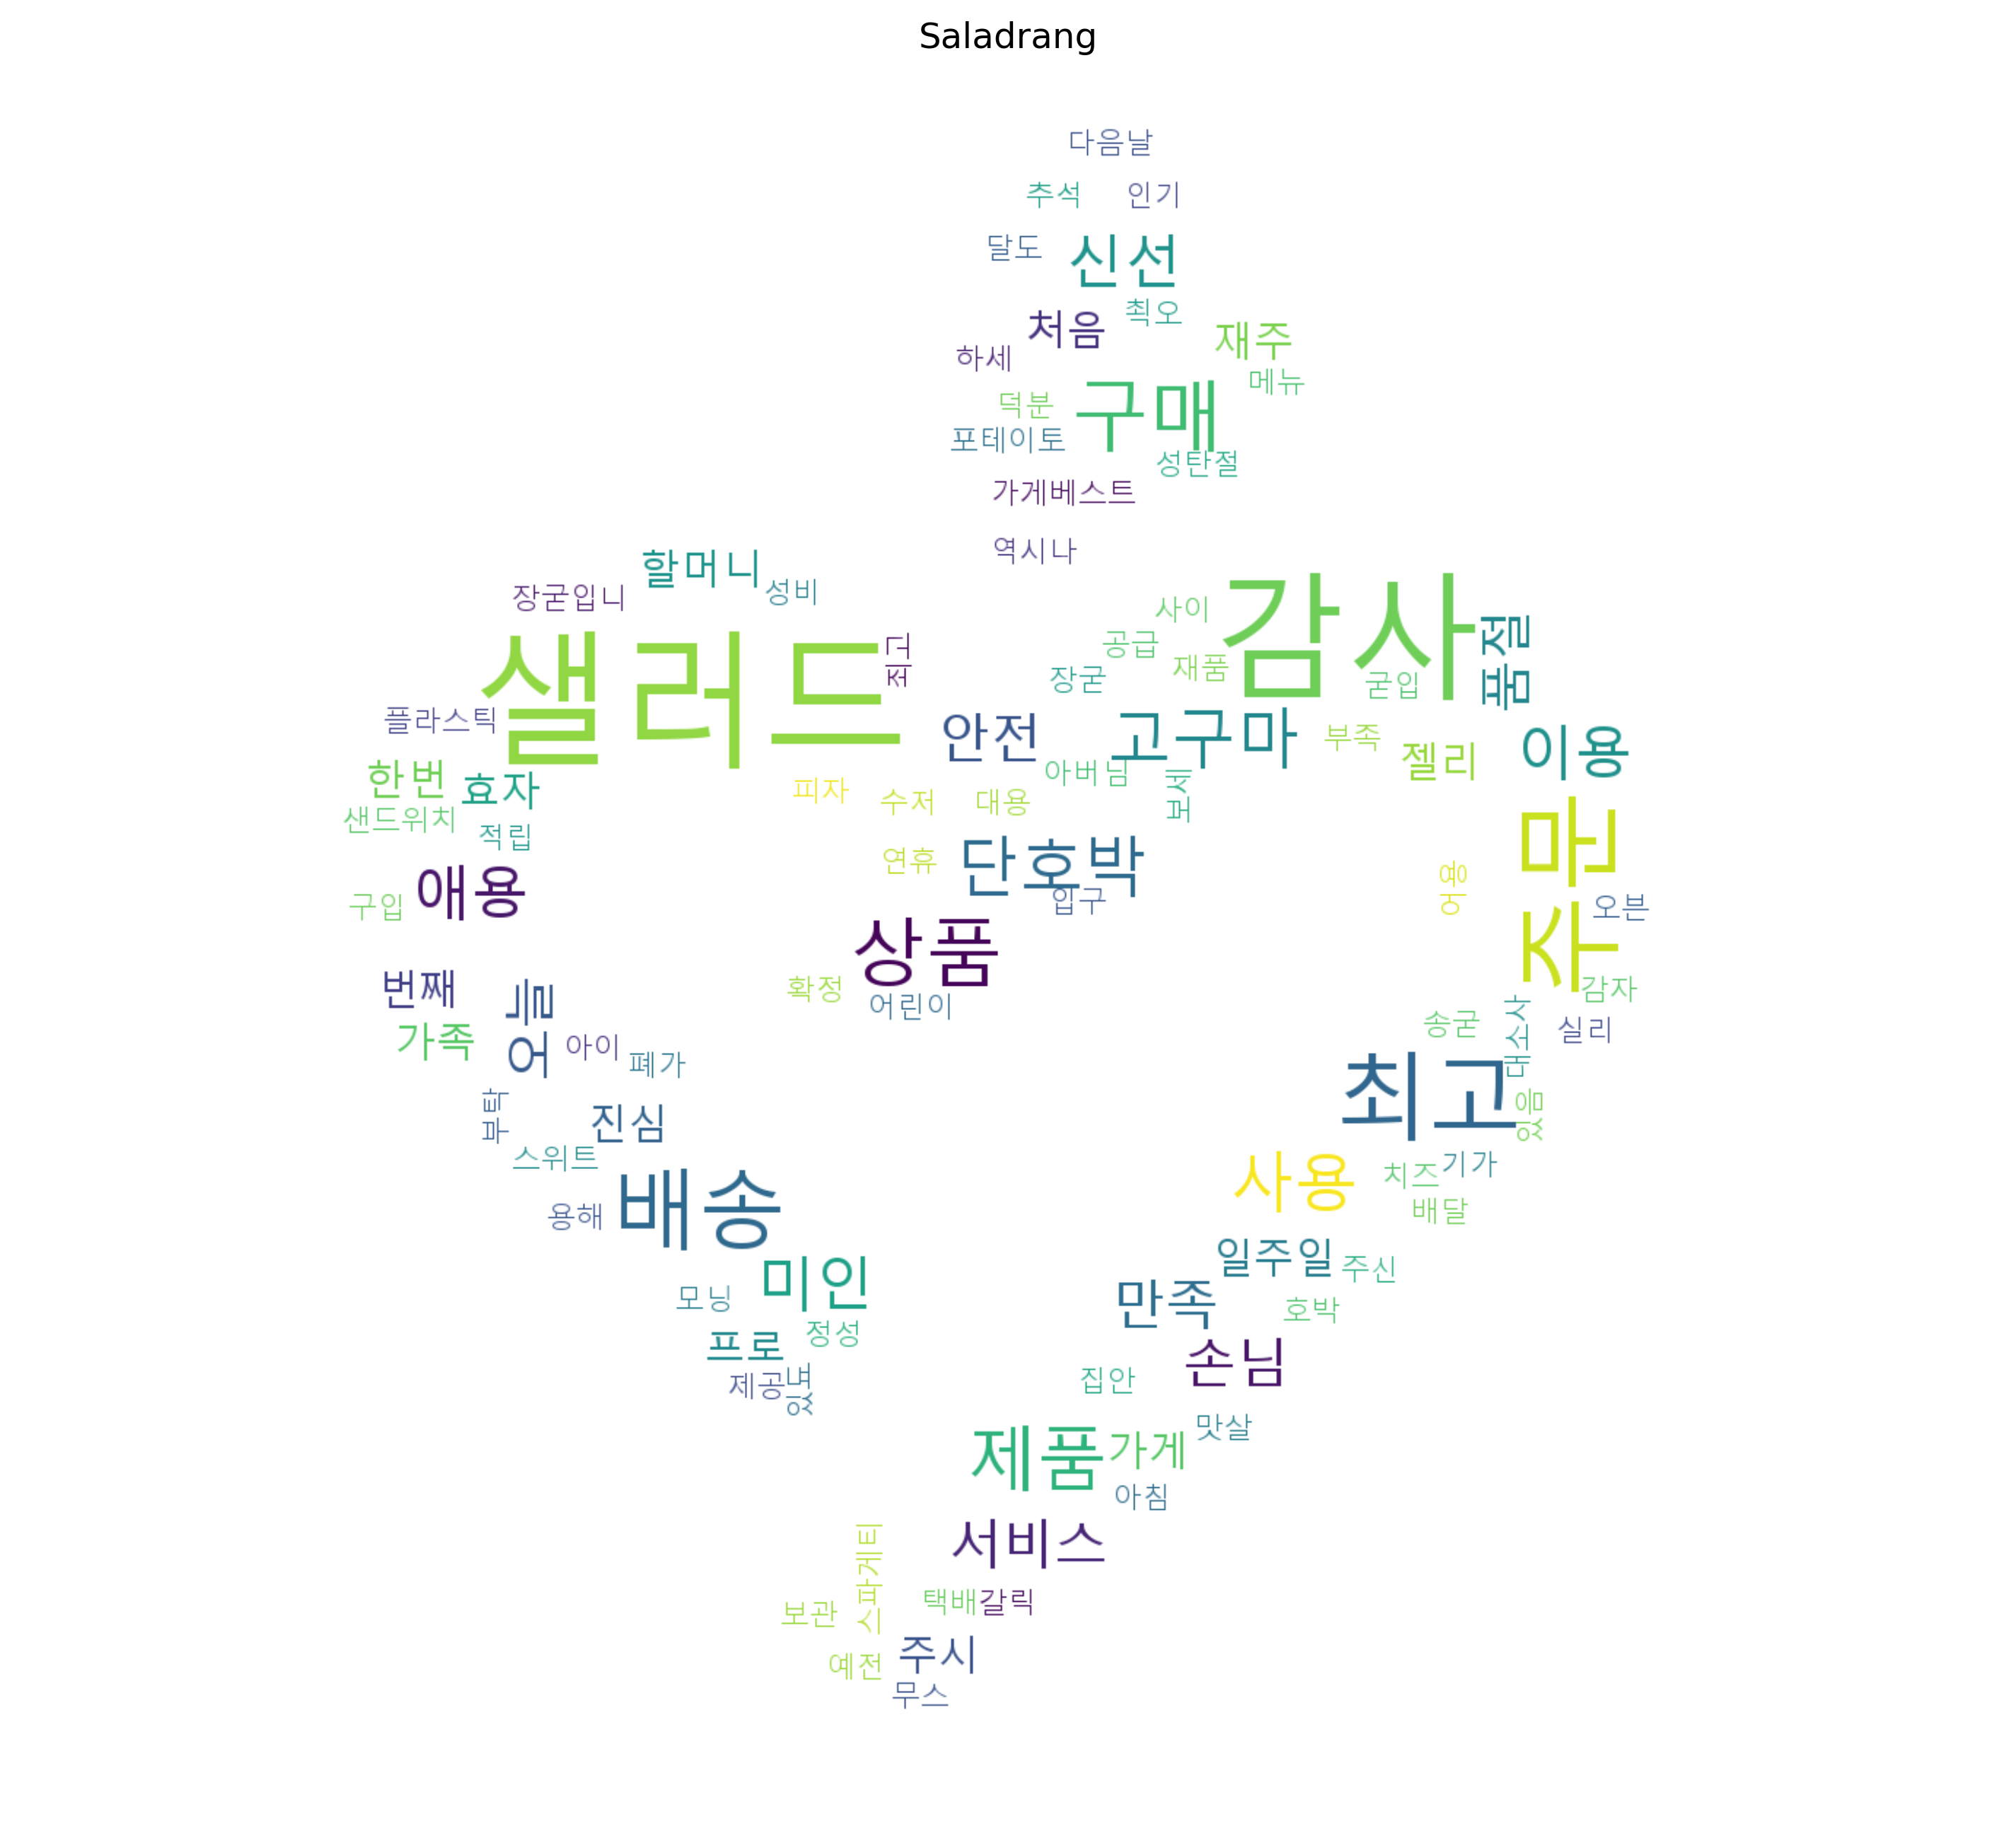

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Kkma
from re import match
from PIL import Image
import numpy as np

# 텍스트 파일 불러오기
with open("shop_text.txt", mode='r', encoding='utf-8') as file:
    doc = file.read()

# 텍스트 전처리 및 명사 추출
kkma = Kkma()
nouns = []  # 명사 저장 리스트
ex_sent = kkma.sentences(doc)  # 문장 단위로 나누기

for sent in ex_sent: 
    for noun in kkma.nouns(sent):  # 각 문장에서 명사 추출
        if len(str(noun)) >= 2 and not match('^[0-9]', noun):  # 2글자 이상, 숫자는 제외
            nouns.append(noun)

# 불용어 제거
stopwords = ['여기', '번은', '하이', '때문', '중인']
words = [word for word in nouns if word not in stopwords]  # 불용어 제외

# 단어 빈도수 계산
word_count = {}
for noun in words:
    word_count[noun] = word_count.get(noun, 0) + 1  # 단어 빈도수 계산

# 상위 50개 단어 출력
counter = Counter(word_count)
top50 = counter.most_common(50)
print("상위 50개 단어:", top50)

# 마스크 이미지 불러오기 (로고 모양으로 설정)
mask_image = np.array(Image.open("salad.png"))  # 마스크 이미지 경로

# 워드클라우드 생성 (설정 조정)
wc = WordCloud(
    font_path='malgun',  # 한글 폰트 설정
    width=1600,  # 이미지 너비 설정
    height=1600,  # 이미지 높이 설정
    background_color="white",  # 배경색 흰색
    max_words=200,  # 최대 단어 수
    mask=mask_image,  # 마스크 이미지 적용
    contour_width=0,  # 외곽선 두께
    contour_color="gray",  # 외곽선 색상
    max_font_size=25,  # 글자 최대 크기 조정
    scale=4  # 해상도 배율 높이기
)

# 단어 빈도수를 이용해 워드클라우드 생성
wc.generate_from_frequencies(dict(counter))

# 고해상도 이미지 파일로 저장
output_path = "shaped_wordcloud_highres.png"
wc.to_file(output_path)
print(f"워드클라우드 이미지가 저장되었습니다: {output_path}")

# 워드클라우드 시각화 (화질 개선)
plt.figure(figsize=(12, 12), dpi=300)  # 시각화 크기 및 DPI 설정
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")  # 축 제거
plt.title("Saladrang")
plt.show()
